In [2]:
#read csv
import pandas as pd
import numpy as  np

df = pd.read_csv('atussum_0321.csv', header='infer')
df.head(2)

,TUCASEID,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TELFS,TEMJOT,TESCHENR,...,t181801,t181899,t189999,t500101,t500103,t500104,t500105,t500106,t500107,t509989
0,20030100013280,1,-1,44,2,2,60,2,2,-1,...,0,0,0,0,0,0,0,0,0,0
1,20030100013344,2,-1,40,2,1,41,1,2,2,...,0,0,0,0,0,0,0,0,0,0


In [3]:
processed_df = pd.read_csv('processedDF.csv', header='infer')
processed_df.head()

C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (455) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,TUCASEID,MetStat,EduStat,Hisp,Race,Age,LaborStat,IsStudying,SchoolLevel,...,LaborGrp,IsStudyGrp,SchoolLevelGrp,SpousePresentGrp,SpouseEmplGrp,SelfEmplTimeGrp,SpouseEmplTimeGrp,ChildNumGrp,YChildAgeGrp,EarningsGrp
0,0,20030100013280,NaN,44,2,2.0,60,2.0,NaN,NaN,...,Employed,NaN,NaN,Y,N,PT,NaN,None,NaN,Low Middle Class
1,1,20030100013344,NaN,40,2,1.0,41,1.0,2.0,NaN,...,Employed,N,NaN,Y,Y,PT,FT,1-2 children,Baby,Low Income
2,2,20030100013352,NaN,41,2,1.0,26,2.0,2.0,NaN,...,Employed,N,NaN,Y,N,PT,NaN,None,NaN,Low Income
3,3,20030100013848,NaN,39,2,2.0,36,4.0,2.0,NaN,...,Unemployed,N,NaN,Y,Y,NaN,FT,1-2 children,NaN,NaN
4,4,20030100014165,NaN,45,2,1.0,51,1.0,NaN,NaN,...,Employed,NaN,NaN,Y,N,FT,NaN,1-2 children,Teen,NaN


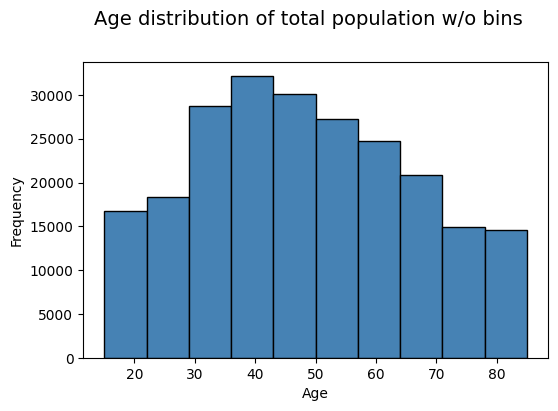

In [9]:
import matplotlib.pyplot as plt

#Age distribution of total population w/o bins
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Age distribution of total population w/o bins", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency") 
freq, bins, patches = ax.hist(processed_df['Age'], color='steelblue',
                                    edgecolor='black', linewidth=1)

<Figure size 600x400 with 0 Axes>

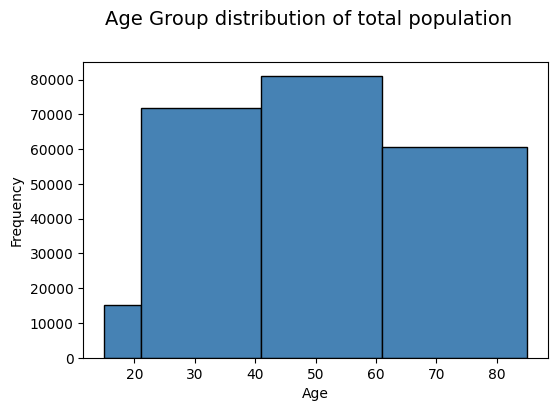

In [25]:
#not needed - use next one

#Age group distribution of total population
#with customized bins, we can see there are not many samples for age group 15-20
fig = plt.figure(figsize = (6,4))
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Age Group distribution of total population", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency") 
freq, bins, patches = ax.hist(processed_df['Age'], color='steelblue', bins=[15, 21, 41, 61, 85],
                                    edgecolor='black', linewidth=1)

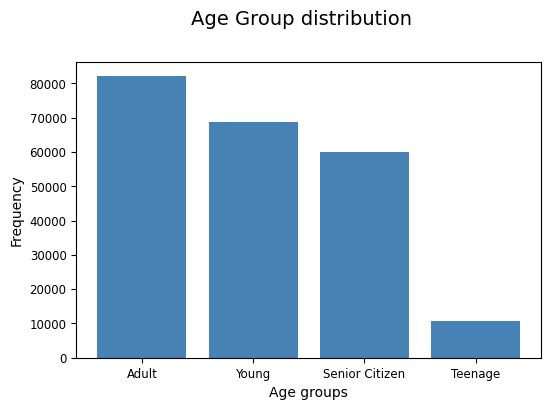

In [23]:
#treat age as categorical variables - better than earlier one where we manually defined beans. Rigth skewing more visible

fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Age Group distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Age groups")
ax.set_ylabel("Frequency") 
df_age = processed_df['AgeGrp'].value_counts()
df_age = (list(df_age.index), list(df_age.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(df_age[0], df_age[1], color='steelblue')


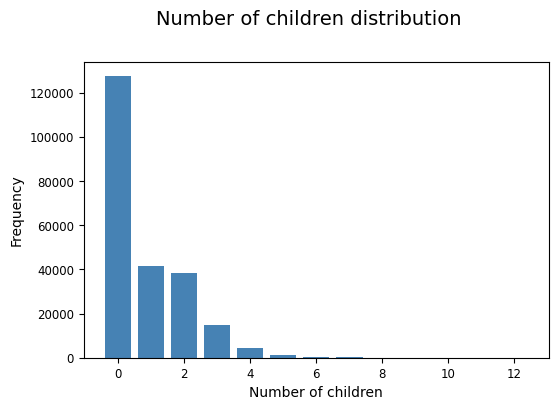

In [38]:
#number of children
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Number of children distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Number of children")
ax.set_ylabel("Frequency") 
df_num_children = processed_df['ChildNum'].value_counts()
df_num_children = (list(df_num_children.index), list(df_num_children.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(df_num_children[0], df_num_children[1], color='steelblue')

#todo - zoom in for numchildren > 6 using subplot?

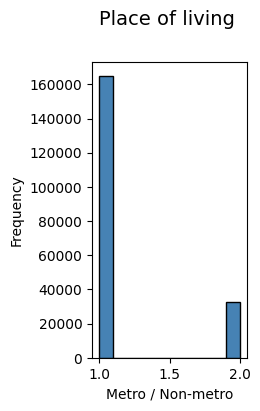

In [44]:
# #metro / non-metro status
# fig = plt.figure(figsize = (2, 4))
# title = fig.suptitle("Place of living", fontsize=14)
# fig.subplots_adjust(top=0.85, wspace=0.3)

# ax = fig.add_subplot(1,1,1)
# ax.set_xlabel("Metro / Non-metro")
# ax.set_ylabel("Frequency") 

# df_living_status = processed_df['MetStat'].value_counts()
# df_living_status = (list(df_living_status.index), list(df_living_status.values))
# ax.tick_params(axis='both', which='major', labelsize=8.5)
# bar = ax.bar(df_living_status[0], df_living_status[1], color='steelblue')


# #metro / non-metro status
#change in processed_df to metro / non-metro
fig = plt.figure(figsize = (2, 4))
title = fig.suptitle("Place of living", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Metro / Non-metro")
ax.set_ylabel("Frequency") 
freq, bins, patches = ax.hist(processed_df['MetStat'], color='steelblue',
                                    edgecolor='black', linewidth=1)
#todo - x-axis values as per values in list

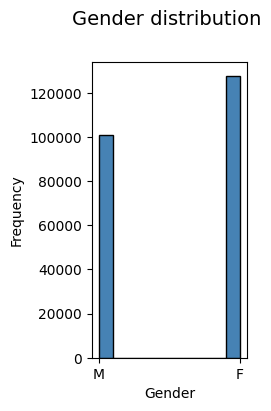

In [42]:
#gender distribution
fig = plt.figure(figsize = (2, 4))
title = fig.suptitle("Gender distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Gender")
ax.set_ylabel("Frequency") 
freq, bins, patches = ax.hist(processed_df['SexGrp'], color='steelblue',
                                    edgecolor='black', linewidth=1)
#todo - x-axis values as per values in list

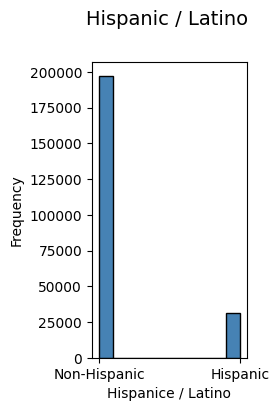

In [45]:
#hispanic - non-hispanic
fig = plt.figure(figsize = (2, 4))
title = fig.suptitle("Hispanic / Latino", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Hispanic / Latino")
ax.set_ylabel("Frequency") 
freq, bins, patches = ax.hist(processed_df['HispGrp'], color='steelblue',
                                    edgecolor='black', linewidth=1)

In [50]:
#2d 
filtered_df = pd.read_csv('atussum_0321.csv', header='infer', usecols=["TESEX", "GTMETSTA", "TRCHILDNUM","PEHSPNON","TEAGE"])

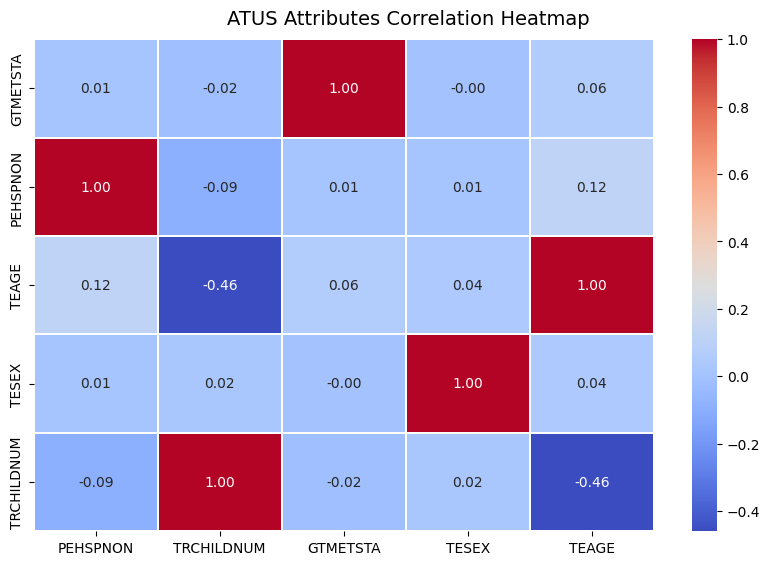

In [51]:
#check
import seaborn as sns

cols = ['PEHSPNON', 'TRCHILDNUM', 'GTMETSTA', 'TESEX', 'TEAGE']

f, ax = plt.subplots(figsize=(10, 6))

corr = filtered_df.corr()[cols]
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('ATUS Attributes Correlation Heatmap', fontsize=14)

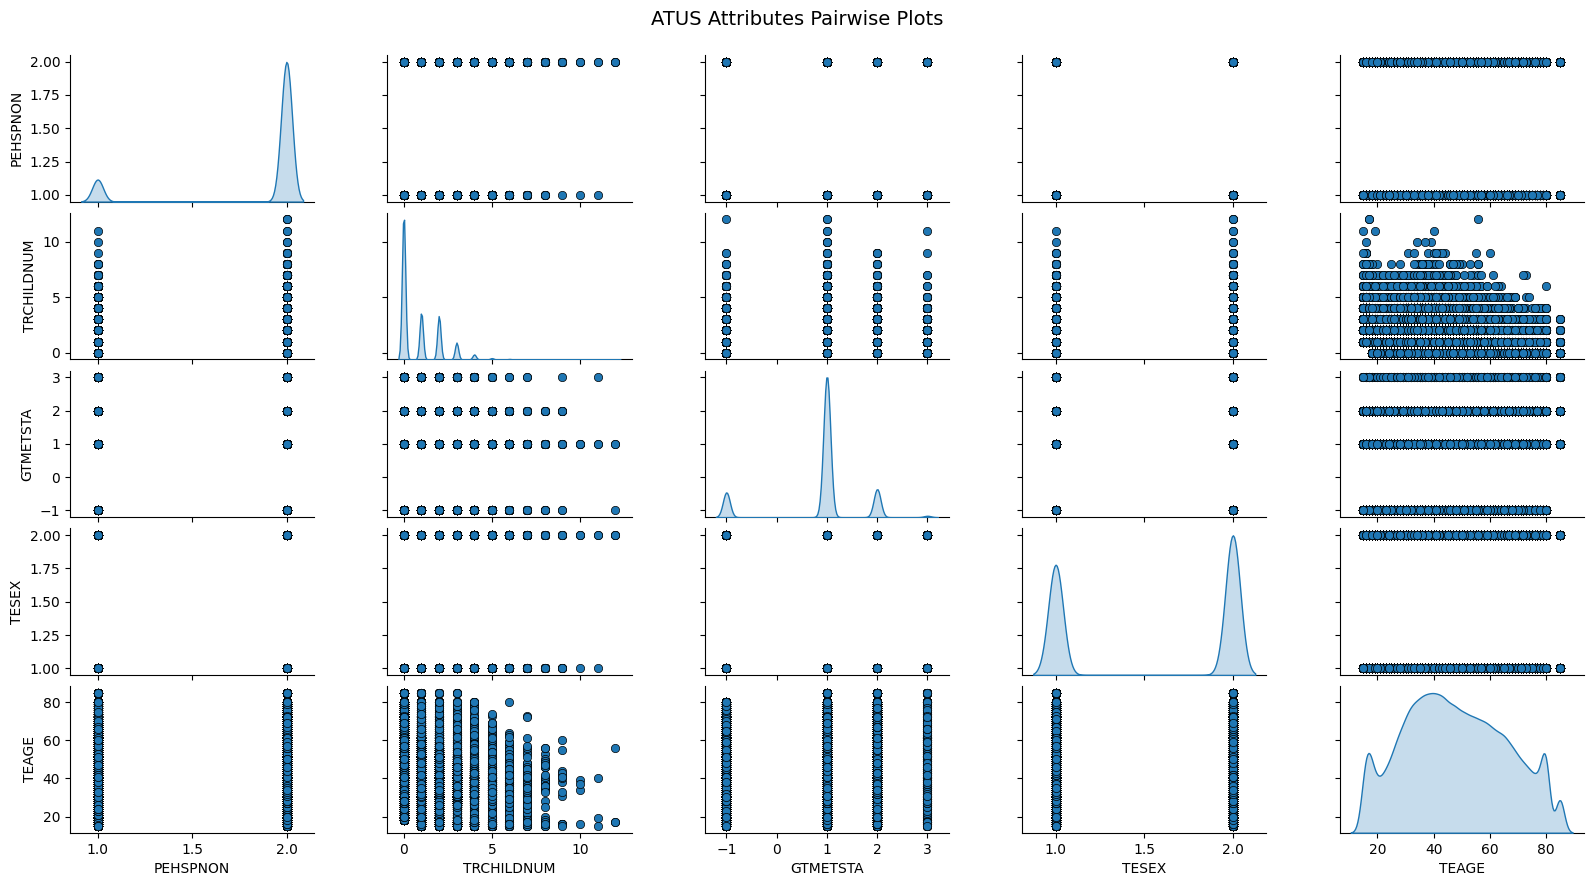

In [12]:
#pair wise scatter plot
#not needed? - check
pp = sns.pairplot(filtered_df[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('ATUS Attributes Pairwise Plots', fontsize=14)


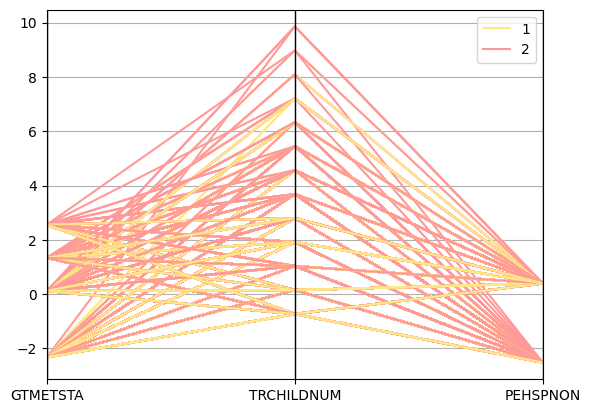

In [13]:
# Scaling attribute values to avoid few outiers
#not needed?
cols = ["GTMETSTA", "TRCHILDNUM","PEHSPNON"]
subset_df = filtered_df[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, filtered_df['TESEX']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'TESEX', color=('#FFE888', '#FF9999'))

In [ ]:
# #subplots are better to view 2D discrete variables and most of are variables are discrete only
# fig = plt.figure(figsize = (10, 4))
# title = fig.suptitle("Gender distribtuion as per place of living", fontsize=14)
# fig.subplots_adjust(top=0.85, wspace=0.3)

# ax1 = fig.add_subplot(1,2, 1)
# ax1.set_title("Metro")
# #ax1.set_xlabel("Quality")
# ax1.set_ylabel("Frequency")
# df1 = filtered_df.query('GTMETSTA == 1')
# rw_q = df1['TESEX'].value_counts()
# rw_q = (list(rw_q.index), list(rw_q.values))
# # ax1.set_ylim([0, 2500])
# ax1.tick_params(axis='both', which='major', labelsize=8.5)
# bar1 = ax1.bar(rw_q[0], rw_q[1], color='red')


# ax2 = fig.add_subplot(1,2, 2)
# ax2.set_title("Non-metro")
# ax2.set_xlabel("Quality")
# ax2.set_ylabel("Frequency") 
# df2 = filtered_df.query('GTMETSTA == 2')
# rw_q = df2['TESEX'].value_counts()
# ww_q = (list(ww_q.index), list(ww_q.values))
# # ax2.set_ylim([0, 2500])
# ax2.tick_params(axis='both', which='major', labelsize=8.5)

# ax2.bar(ww_q[0], ww_q[1], color='#FFDC51')

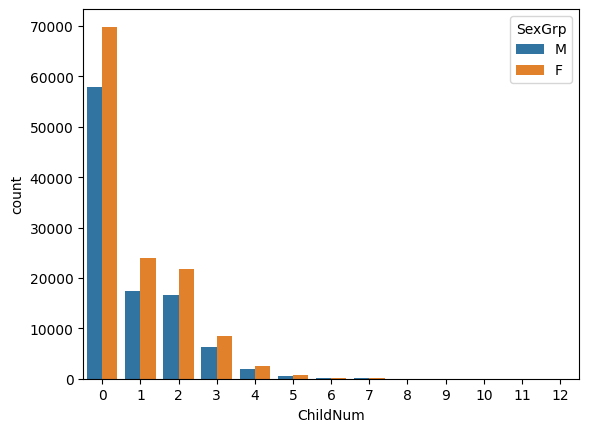

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cp = sns.countplot(x="ChildNum", hue="SexGrp", data=processed_df)

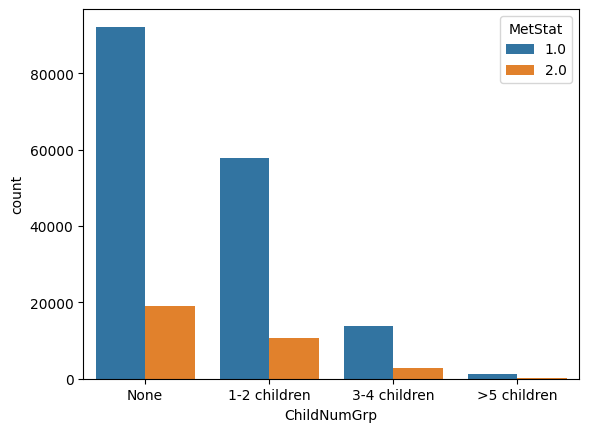

In [58]:
#children population by living status

cp = sns.countplot(x="ChildNumGrp", hue="MetStat", data=processed_df)

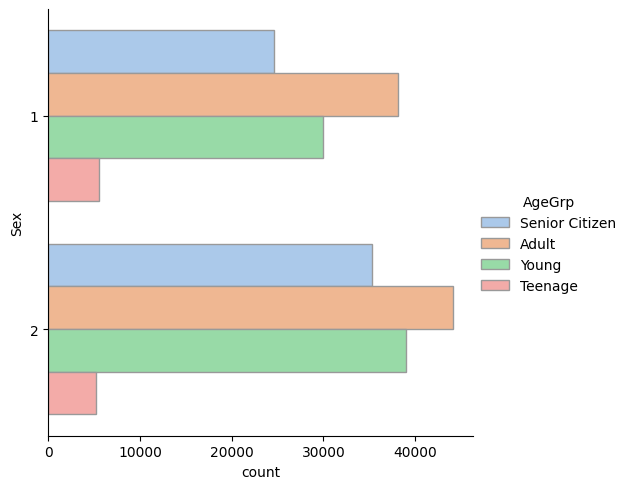

In [82]:
sns.catplot(
    data=processed_df, y="Sex", hue="AgeGrp", kind="count",
    palette="pastel", edgecolor=".6",
)

Text(0, 0.5, 'Number of children')

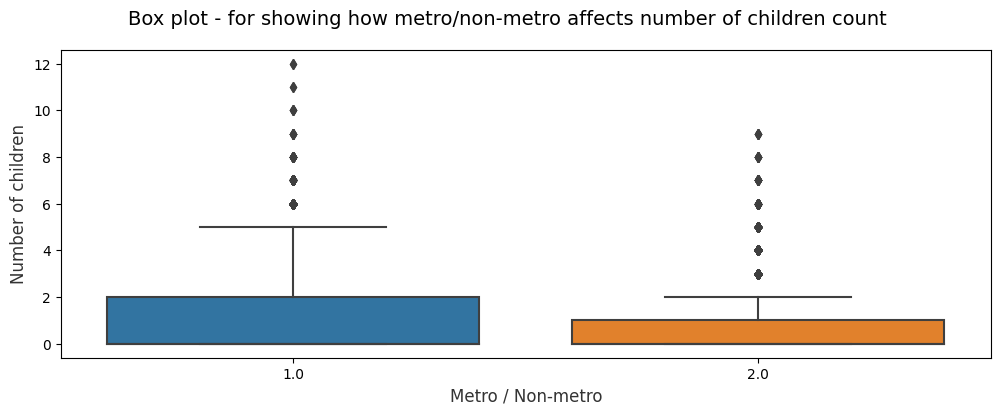

In [66]:
# Box Plots - check - not needed
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Box plot - for showing how metro/non-metro affects number of children count ', fontsize=14)

sns.boxplot(x="MetStat", y="ChildNum", data=processed_df,  ax=ax)
ax.set_xlabel("Metro / Non-metro",size = 12,alpha=0.8)
ax.set_ylabel("Number of children",size = 12,alpha=0.8)

Text(0, 0.5, 'Number of children')

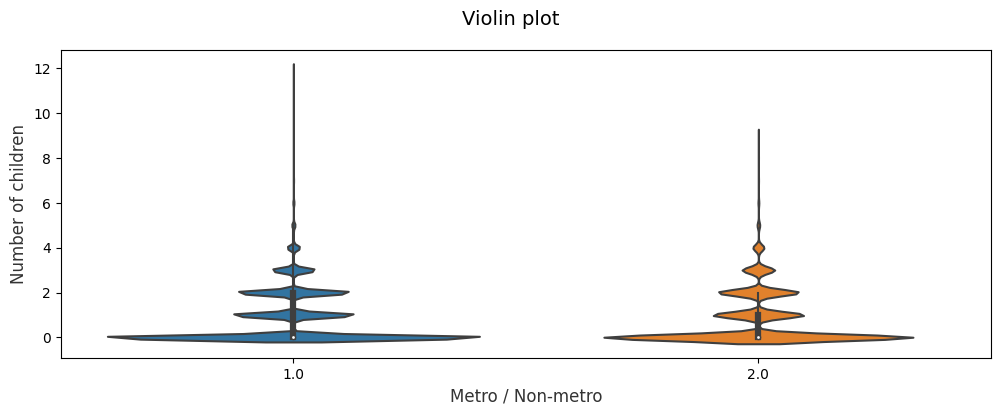

In [67]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Violin plot', fontsize=14)

sns.violinplot(x="MetStat", y="ChildNum", data=processed_df,  ax=ax)
ax.set_xlabel("Metro / Non-metro",size = 12,alpha=0.8)
ax.set_ylabel("Number of children",size = 12,alpha=0.8)


KeyboardInterrupt: 

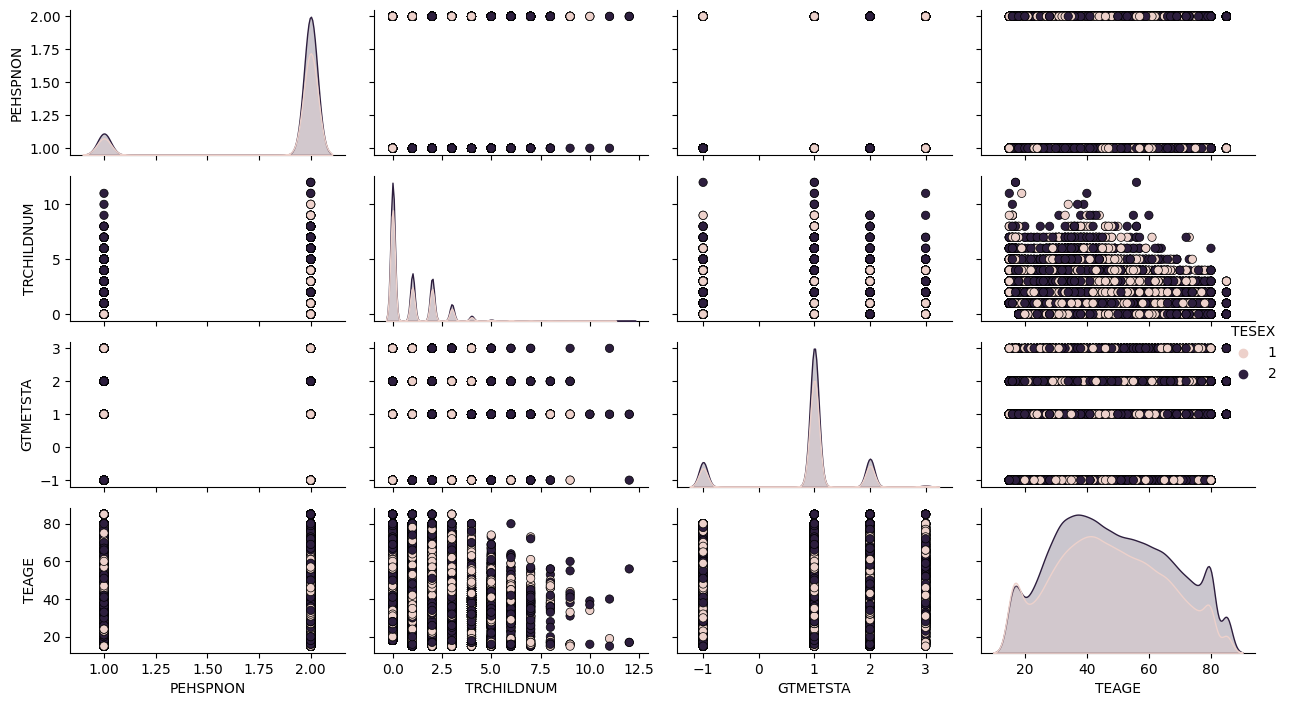

In [68]:
cols = ['PEHSPNON', 'TRCHILDNUM', 'GTMETSTA', 'TESEX', 'TEAGE']
pp = sns.pairplot(filtered_df1[cols], hue='TESEX', height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

Text(0.5, 0, 'Gender')

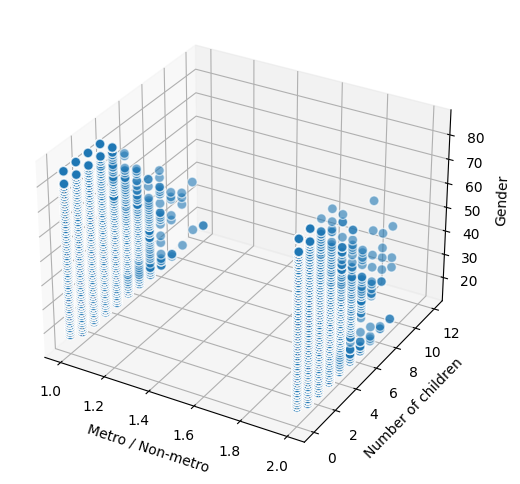

In [73]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
# not very effective
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = processed_df['MetStat']
ys = processed_df['ChildNum']
zs = processed_df['Age']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Metro / Non-metro')
ax.set_ylabel('Number of children')
ax.set_zlabel('Gender')

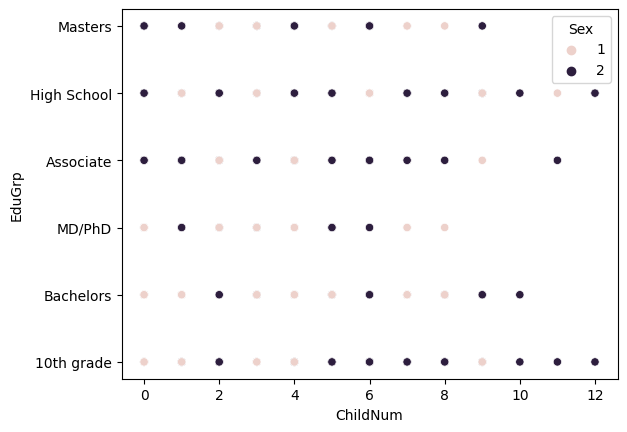

<AxesSubplot:xlabel='ChildNum', ylabel='EduGrp'>

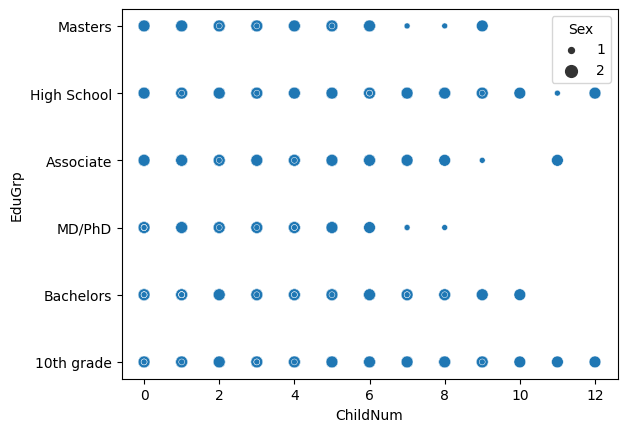

In [81]:
#issue with syntax here
# using size for the 3rd dimension
#any measure column can be used here?
# sc = sns.scatterplot(processed_df['Sex'], processed_df['RaceGrp'], 
#                 size=processed_df['ChildNum'])

sns.scatterplot(data = processed_df, x = "ChildNum", y = "EduGrp", hue = "Sex")
plt.show()

# using size for the 3rd dimension
sns.scatterplot(data = processed_df, x = "ChildNum", y = "EduGrp", size = "Sex")
#size = "MetStat"

In [72]:
#check
fc = sns.factorplot(x="Race", hue="Sex", col="RaceGrp", 
                    data=processed_df, kind="count")


AttributeError: module 'seaborn' has no attribute 'factorplot'